# Forest Fire Analysis

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Summary

This data set, from the UCI Machine Learning Repository, contains information about forest fires in the northeast reason of Portugal (Montesinho park in particular). It was put there in order for someone to be able to use regression to predict the burned area of the forest fires. From the UCI website, here are the column values:

>1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

Most of these features are self-explanatory, except for features 5-8.Those four are features that relate to the moisture content of the forest. Each of the first three (FFMC, DMC, DC) refer to the moisture content of progressively deeper layers of the ground. The last one, ISI, indicates the likelyhood of initial spread using some combination of the FFMC and the wind speed.  As each of those features increases in value, the forest is supposedly more susceptible to burning.

As this data was designed to predict the variable area, we can first use some visualizations to ask a few questions about the data. The first question I would ask is how is the variable 'area' distributed? This would give some insight into what steps we would take in order to perform a regression on it. Let's plot a histogram to visualize 'area'.

In [2]:
# import data
forestfire_df = pd.read_csv('data/forestfires.csv')

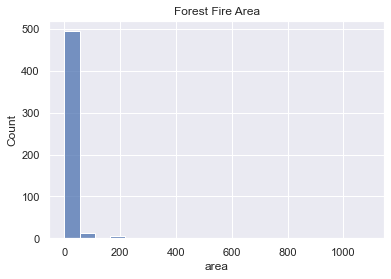

max area: 1090.84
median area: 0.52


In [3]:
# histogram
sns.set(rc={'figure.figsize':(8,5)})
sns.histplot(data=forestfire_df, x='area', bins=20)
plt.title('Forest Fire Area')
plt.show()
print(f"max area: {max(forestfire_df['area'])}")
print(f"median area: {np.median(forestfire_df['area'])}")

This distribution is tricky to visualize. The maxium area is 2000 times larger than the median. We can see this causes trouble both visually, and would be a pain to model. Instead, we can transform the variable to a log scale and see how it looks. We will use a log base 10 and area + 1 as the argument to deal with the case where area=0.

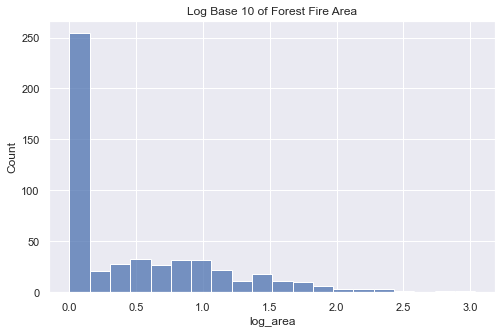

In [4]:
# transform to log scale
forestfire_df['log_area'] = np.log10(forestfire_df['area'] + 1)


# histogram
sns.set(rc={'figure.figsize':(8,5)})
sns.histplot(data=forestfire_df, x='log_area', bins=20)
plt.title('Log Base 10 of Forest Fire Area')
plt.show()

This looks much better. Now we have a better idea how the variable is distributed, and we have a more useful target variable.

My next question comes from the intuition that forest fires are seasonal. Specifically, we can ask which months have the biggest forest fires. This can be the largest average, or it can be the occurance of the largest forest fires. We can simply use a box plot to show the distribution of forest fire sizes for each month. Again, we will use the log area of the forest fire for the same reasons as above.

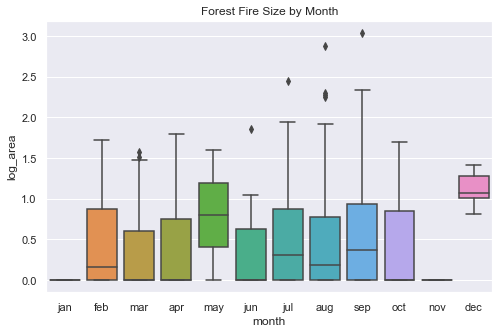

In [5]:
# box plot
o = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.boxplot(data=forestfire_df, x='month', y='log_area', order=o)
plt.title('Forest Fire Size by Month')
plt.show()

The first insight that jumps out is that the largest forest fires occur in the summer months. This shouldn't be surprising. What is also interesting is that the largest averages occur in May and December. This could be misleading, however, if May and December have much less forest fires in total. Let's see if that is the case.

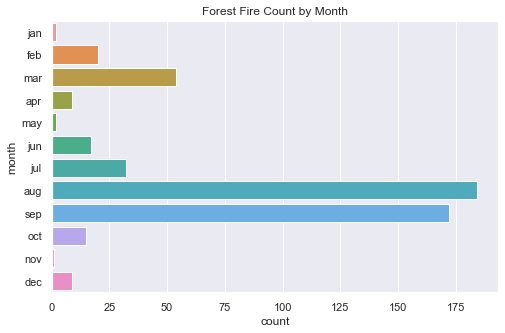

In [6]:
# count plot
o = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.countplot(data=forestfire_df, y='month', order=o)
plt.title('Forest Fire Count by Month')
plt.show()

May and December have a much lower total number of fires than the summer months. I would be hesitant to extrapolate from the box plot that larger forest fires are somehow "more likely" in those months.

My next question is going to concern the variables 'FFMC', 'DMC', 'DC', and 'ISI'. As mentioned, these variable all relate to the moisture content of the burnable fuel. I am going to visualize how these variables relate to the (log) area of fires using a scatter plot with a regression line using bands of a 95% confidence interval. Here I am asking if any of these variables has an immediate, easy to discern relationship with the area of burned fires.

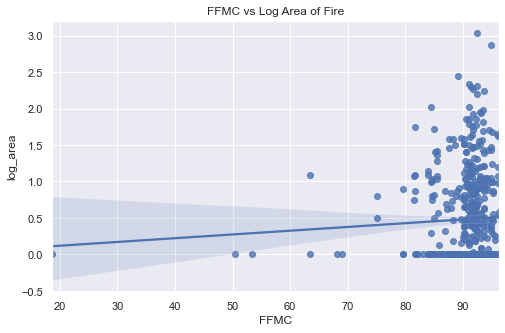

In [7]:
# FFMC vs log area
sns.regplot(data=forestfire_df, x='FFMC', y='log_area')
plt.title('FFMC vs Log Area of Fire')
plt.show()

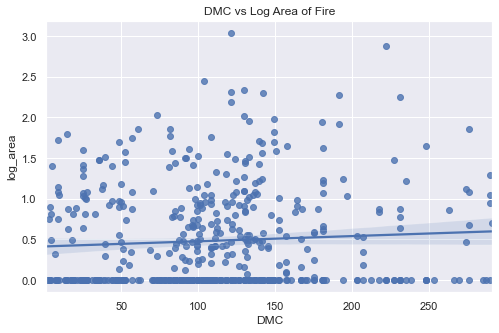

In [8]:
# DMC vs log area
sns.regplot(data=forestfire_df, x='DMC', y='log_area')
plt.title('DMC vs Log Area of Fire')
plt.show()

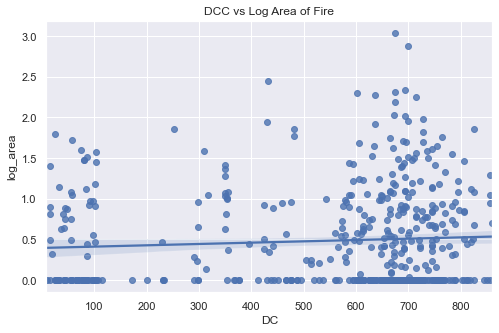

In [9]:
# DC vs log area
sns.regplot(data=forestfire_df, x='DC', y='log_area')
plt.title('DCC vs Log Area of Fire')
plt.show()

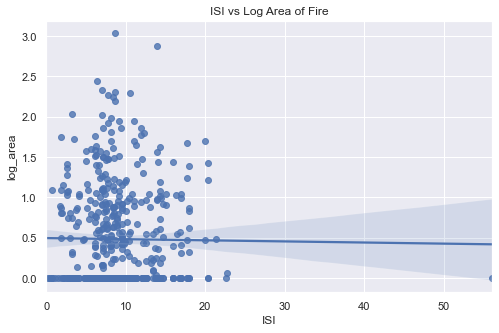

In [10]:
# ISI vs log area
sns.regplot(data=forestfire_df, x='ISI', y='log_area')
plt.title('ISI vs Log Area of Fire')
plt.show()

The regression line seems to perform pretty poorly in explaining the variance in the area of fires. No wonder this data set is posed as a challenge for machine learning!

# Summary

In this notebook, we visually explored some data relating to forest fires. The data set contained the area of each fire, along with the conditions present that might have an effect on the size and spread of the fire. Since this data was intended to perform regression on, our visualizations were focused on preliminary steps towards getting an idea how these variables were related or distributed.

First, we asked how the area of forest fires were distributed. Plotting the histogram actually uncovered an important insight. We learned that rescaling this variable by taking its logarithm would make it a lot more useful than before. Before the transformation, the area of forest fires has far too many with a small value compared to its largest. The second histogram with the log of the area looks much nicer. Going forward, we then use the log of the area instead of the area. This makes the next several plots more informative.

The next question we asked was pretty simple: which months have more, or bigger forest fires. A box plot provided a quick and easy to interpret visualization of this question. We saw that the largest forest fires occured in the summer or early fall months (June-September). Interestingly, two months had higher than expected average forest fire size. Those months were December and May. I suspected that this was a stastical consequence of to having a low amount of forest fires in general. So, we made a bar chart to visualize how many forest fires were in each month. This revealed that December and May did in fact have a much lower amount of forest fires than many of the summer months in between. For this reason, I suggested that it may be misleading to conclude that bigger fires are more likely in the months with the largest average forest fire size.

Finally, we investiged the variables relating to the moisture content of the forest to see if they had a straightforward relationship to the size of the forest fire. We plotted the value of the moisture conent against the log of the area of the forest fire, and plotted a linear regression line with a 95% confidence interval along with it. The regression line was mostly flat, often with a decent amount of variance, and did next to nothing to explain the variance in the area of the forest fire. The relationship between the moisture content and area of the forest fire (if any exists) is complicated and is not well-represented by this visualization.

In all, I think these visualizations did provide some valuable insights to this data set. If I were to attempt a regression on it, this would have taught me at least how to treat the target variable, and what kind of relationships to expect out of some of the features.